In [1]:
import pandas as pd

# Loading the Data

In [8]:
users = pd.read_csv('takehome_users.csv',encoding='latin-1', parse_dates=True)
user_engagement = pd.read_csv('takehome_user_engagement.csv',encoding='latin-1', parse_dates=True)

In [9]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [10]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [12]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [14]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [13]:
user_engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [15]:
import datetime

user_engagement.time_stamp = pd.to_datetime(user_engagement.time_stamp)
user_engagement = user_engagement.set_index('time_stamp', drop= True)

In [31]:
from datetime import timedelta

def isadopted(x):
    "takes user id as input and returns if the user have been active for at least 3 days in 7 day period"
    temp = user_engagement.loc[user_engagement['user_id'] == x] # select the rows having user_id = x
    temp = temp.resample('D').mean().dropna()
    adopted = 0
    for i in range(len(temp)-2):
        if temp.index[i+2] - temp.index[i] <=timedelta(days=7): #finding if time interal between i+2th and ith login is less than 7 days
            adopted = 1
            break
        else:
            adopted = 0
    return adopted

In [32]:
users['isadopted'] = users['object_id'].apply(isadopted)

In [33]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,isadopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [34]:
print(sum(users['isadopted']))
print(sum(users['isadopted'])/len(users['isadopted']))

1656
0.138


Total of 1656 users were adopted and the adoption rate is 13.8%

In [38]:
users['object_id'].nunique()

12000

In [39]:
user_engagement['user_id'].nunique()

8823

In [58]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,isadopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [59]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  isadopted                   12000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [66]:
df  = users.drop(['object_id','name','creation_time','email','last_session_creation_time','org_id'],axis=1)

In [67]:
df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,isadopted
0,GUEST_INVITE,1,0,10803.0,0
1,ORG_INVITE,0,0,316.0,1
2,ORG_INVITE,0,0,1525.0,0
3,GUEST_INVITE,0,0,5151.0,0
4,GUEST_INVITE,0,0,5240.0,0


In [75]:
df['invited'] = df['invited_by_user_id'] > 0
df['invited'] = df['invited'].apply(int)
df.drop('invited_by_user_id', inplace=True, axis = 1)

In [76]:
df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,isadopted,invited
0,GUEST_INVITE,1,0,0,1
1,ORG_INVITE,0,0,1,1
2,ORG_INVITE,0,0,0,1
3,GUEST_INVITE,0,0,0,1
4,GUEST_INVITE,0,0,0,1


In [79]:
# Get dummy variables to represent different creation sources
df_dummy  = pd.get_dummies(df)

df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   opted_in_to_mailing_list            12000 non-null  int64
 1   enabled_for_marketing_drip          12000 non-null  int64
 2   isadopted                           12000 non-null  int64
 3   invited                             12000 non-null  int64
 4   creation_source_GUEST_INVITE        12000 non-null  uint8
 5   creation_source_ORG_INVITE          12000 non-null  uint8
 6   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8
 7   creation_source_SIGNUP              12000 non-null  uint8
 8   creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8
dtypes: int64(4), uint8(5)
memory usage: 433.7 KB


In [82]:
from sklearn.ensemble import RandomForestClassifier

X = df_dummy.drop('isadopted', axis=1)
y = df_dummy['isadopted']

In [93]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X,y)

RandomForestClassifier()

In [94]:
rfc.feature_importances_

array([0.07906844, 0.07482039, 0.04532812, 0.12714328, 0.05722229,
       0.45220156, 0.04367396, 0.12054196])

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

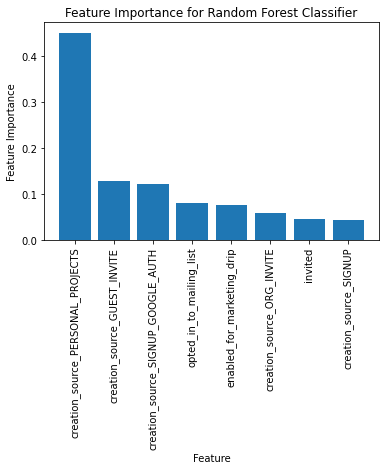

In [95]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.argsort(rfc.feature_importances_)[::-1]
plt.bar(X.columns[xx], rfc.feature_importances_[xx])
plt.title('Feature Importance for Random Forest Classifier')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.xticks(rotation = 90)

> 1. It is higly likely that a user will be adopted if he creates the account for Personal Project. 
> 2. Likelyhood of adopted is determined by Creation Source

# Future Reserch 

> Investigate the effect the invited feauture on user adoption. and how can user adoption be incresed through invites